In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import sys
sys.path.append('..')
from utils.read_utils import load_dataset, load_dataset_7, load_indicators3, load_horizons
from utils.plot_utils import print_score, inverse_transform, plot_prediction
from algorithms.model import build_model, lstm_train, svr_train, score
from sklearn.svm import SVR 

KeyError: 'mode_reflect'

In [4]:
import sklearn

KeyError: 'mode_reflect'

In [ ]:
# Import the dataset
X_train, X_test, y_train, y_test = load_dataset()
X_train_7, X_test_7, y_train_7, y_test_7 = load_dataset_7()
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train_7.shape, X_test_7.shape, y_train_7.shape, y_test_7.shape

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
# Import indicators and horizons
technical_indicators, fundamental_indicators, combined_indicators = load_indicators3()
horizons, horizons_7 = load_horizons()
len(technical_indicators), len(fundamental_indicators), len(combined_indicators)

# For one company

In [ ]:
X_train_one = X_train.loc[X_train['Symbol'] == "AAPL"].copy()
X_test_one = X_test.loc[X_test['Symbol'] == "AAPL"].copy()
y_train_one = y_train.loc[y_train['Symbol'] == "AAPL"].copy()
y_test_one = y_test.loc[y_test['Symbol'] == "AAPL"].copy()
X_train_one.shape, X_test_one.shape, y_train_one.shape, y_test_one.shape

In [ ]:
# Normalizing the data set 
X_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler.fit_transform(X_train_one[combined_indicators])
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler.fit_transform(y_train_one.loc[: ,horizons])
X_scaler

In [ ]:
X_train_one[combined_indicators] = X_scaler.transform(X_train_one[combined_indicators])
X_test_one[combined_indicators] = X_scaler.transform(X_test_one[combined_indicators])
X_train_one.head()

In [ ]:
y_train_one.loc[: ,horizons] = y_scaler.transform(y_train_one.loc[: ,horizons])
y_test_one.loc[: ,horizons] = y_scaler.transform(y_test_one.loc[: ,horizons])
y_test_one.tail()

In [ ]:
lstm = build_model(technical_indicators, units=64, activation = 'relu', dropout_rate=0.2)
preds_train, preds_test = lstm_train(technical_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=lstm)
print_score("Technical Indicators", horizons, "LSTM", y_test_one, preds_test)
plt.figure(figsize=(15,10))
plot_prediction("Technical Indicators", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

In [ ]:
svr = SVR(C=0.3, kernel='poly', gamma=3, max_iter=1000000)
preds_train, preds_test = svr_train(technical_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=svr)
print_score("Technical Indicators", horizons, "SVR", y_test_one, preds_test)
plt.figure(figsize=(15,10))
plot_prediction("Technical Indicators", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

In [ ]:
preds_train = []
preds_test = []
plt.figure(figsize=(16,8))

svr = SVR(C=0.3, kernel='poly', gamma=3, max_iter=1000000)
lstm = build_model(technical_indicators, units=32, activation = 'relu', dropout_rate=0.2)

preds_train, preds_test = lstm_train(technical_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=lstm)
print_score("Technical Indicators", horizons, "LSTM", y_test_one, preds_test)
plt.subplot(3,2,1)
plot_prediction("Technical Indicators", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(technical_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=svr)
print_score("Technical Indicators", horizons, "SVR", y_test_one, preds_test)
plt.subplot(3,2,2)
plot_prediction("Technical Indicators", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

lstm = build_model(fundamental_indicators, units=32, activation = 'relu', dropout_rate=0.2)
preds_train, preds_test = lstm_train(fundamental_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=lstm)
print_score("Fundamental Indicators", horizons, "LSTM", y_test_one, preds_test)
plt.subplot(3,2,3)
plot_prediction("Fundamental Indicators", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(fundamental_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=svr)
print_score("Fundamental Indicators", horizons, "SVR", y_test_one, preds_test)
plt.subplot(3,2,4)
plot_prediction("Fundamental Indicators", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

lstm = build_model(combined_indicators, units=32, activation = 'relu', dropout_rate=0.2)
preds_train, preds_test = lstm_train(combined_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=lstm)
print_score("Combined Indicators", horizons, "LSTM", y_test_one, preds_test)
plt.subplot(3,2,5)
plot_prediction("Combined Indicators", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(combined_indicators, horizons, X_train_one, y_train_one, X_test_one, y_test_one, model=svr)
print_score("Combined Indicators", horizons, "SVR", y_test_one, preds_test)
plt.subplot(3,2,6)
plot_prediction("Combined Indicators", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=.5,hspace=.5)

# For all conpanies

In [11]:
# Normalizing the data set 
X_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler.fit_transform(X_train[combined_indicators])
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler.fit_transform(y_train.loc[: ,horizons])
X_scaler_7 = MinMaxScaler(feature_range=(0, 1))
X_scaler_7.fit_transform(X_test_7[combined_indicators])
y_scaler_7 = MinMaxScaler(feature_range=(0, 1))
y_scaler_7.fit_transform(y_test_7.loc[: ,horizons_7])

array([[0.02922732],
       [0.03014126],
       [0.02991277],
       ...,
       [0.0135559 ],
       [0.01341075],
       [0.01331398]])

In [12]:
X_train[combined_indicators] = X_scaler.transform(X_train[combined_indicators])
X_test[combined_indicators] = X_scaler.transform(X_test[combined_indicators])
X_train_7[combined_indicators] = X_scaler_7.transform(X_train_7[combined_indicators])
X_test_7[combined_indicators] = X_scaler_7.transform(X_test_7[combined_indicators])
X_train.head()

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,0.011414,0.521489,0.497368,0.522757,0.494486,0.870397,0.799826,0.644859,...,0.669363,0.774377,0.760467,0.753250,0.197569,0.253106,0.219259,0.264167,0.470645,0.196512
2018-01-16,AAPL,Information Technology,0.011350,0.521548,0.497388,0.522820,0.563877,0.850170,0.845447,0.600396,...,0.673898,0.788947,0.759739,0.768959,0.172437,0.215096,0.201836,0.247962,0.395169,0.213290
2018-01-17,AAPL,Information Technology,0.011557,0.521756,0.497801,0.522918,0.663147,0.877137,0.872069,0.680633,...,0.679414,0.793836,0.760749,0.773881,0.156438,0.195129,0.189547,0.244940,0.379644,0.217073
2018-01-18,AAPL,Information Technology,0.011568,0.521916,0.498003,0.523034,0.733899,0.862350,0.869359,0.684558,...,0.685279,0.796419,0.754510,0.778368,0.142036,0.184213,0.176485,0.268879,0.418213,0.225209
2018-01-19,AAPL,Information Technology,0.011511,0.521980,0.497908,0.523141,0.655697,0.917391,0.891996,0.643829,...,0.691056,0.800513,0.754135,0.782829,0.131017,0.186203,0.163563,0.293547,0.450448,0.236982


In [13]:
y_train.loc[: ,horizons] = y_scaler.transform(y_train.loc[: ,horizons])
y_test.loc[: ,horizons] = y_scaler.transform(y_test.loc[: ,horizons])
y_train_7.loc[: ,horizons_7] = y_scaler_7.transform(y_train_7.loc[: ,horizons_7])
y_test_7.loc[: ,horizons_7] = y_scaler_7.transform(y_test_7.loc[: ,horizons_7])
y_test.tail()

,Symbol,Sector,Close_after_1_day
2021-12-22,XOM,Energy,0.016162
2021-12-23,XOM,Energy,0.016409
2021-12-27,XOM,Energy,0.016352
2021-12-28,XOM,Energy,0.016199
2021-12-29,XOM,Energy,0.016097


In [18]:
preds_train = []
preds_test = []
rmse_lstm = []
rmse_svr = []
plt.figure(figsize=(16,8))

preds_train, preds_test = svr_train(technical_indicators, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))
preds_train, preds_test = svr_train(fundamental_indicators, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))
preds_train, preds_test = svr_train(combined_indicators, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))
preds_train_7, preds_test_7 = svr_train(technical_indicators, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test_7))
preds_train_7, preds_test_7 = svr_train(fundamental_indicators, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test_7))
preds_train_7, preds_test_7 = svr_train(combined_indicators, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test_7))

preds_train, preds_test = lstm_train(technical_indicators, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))
preds_train, preds_test = lstm_train(fundamental_indicators, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))
preds_train, preds_test = lstm_train(combined_indicators, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))
preds_train_7, preds_test_7 = lstm_train(technical_indicators, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test_7))
preds_train_7, preds_test_7 = lstm_train(fundamental_indicators, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test_7))
preds_train_7, preds_test_7 = lstm_train(combined_indicators, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test_7))

Epoch 1/20
2467/2467 [==============================] - 27s 9ms/step - loss: 0.0012
Epoch 2/20
2467/2467 [==============================] - 23s 9ms/step - loss: 1.7726e-04
Epoch 3/20
2467/2467 [==============================] - 22s 9ms/step - loss: 1.4762e-04
Epoch 4/20
2467/2467 [==============================] - 22s 9ms/step - loss: 1.1077e-04
Epoch 5/20
2467/2467 [==============================] - 22s 9ms/step - loss: 1.0051e-04
Epoch 6/20
2467/2467 [==============================] - 23s 9ms/step - loss: 8.0327e-05
Epoch 7/20
2467/2467 [==============================] - 22s 9ms/step - loss: 6.1261e-05
Epoch 8/20
2467/2467 [==============================] - 22s 9ms/step - loss: 6.8665e-05
Epoch 9/20
2467/2467 [==============================] - 22s 9ms/step - loss: 6.5801e-05
Epoch 10/20
2467/2467 [==============================] - 22s 9ms/step - loss: 5.9439e-05
Epoch 11/20
2467/2467 [==============================] - 22s 9ms/step - loss: 5.3263e-05
Epoch 12/20
2467/2467 [===========

<Figure size 1152x576 with 0 Axes>

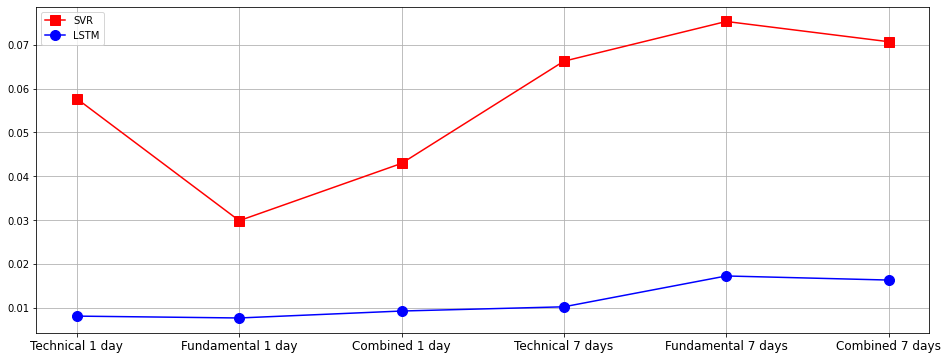

In [19]:
plt.figure(figsize=(12, 6))
xticks = ['Technical 1 day', 'Fundamental 1 day', 'Combined 1 day', 'Technical 7 days', 'Fundamental 7 days', 'Combined 7 days']
plt.plot(xticks, rmse_svr, marker='s', markersize=10, label="SVR")
plt.plot(xticks, rmse_lstm, marker='o', markersize=10, label="LSTM")
plt.xticks(fontsize=12)
plt.ylim(0, 0.1)
plt.legend()
plt.grid(axis='x')
plt.show()

In [14]:
preds_train, preds_test = svr_train(technical_indicators, horizons, X_train, y_train, X_test, y_test)
score(horizons, y_test, preds_test)

0.0576990231132232

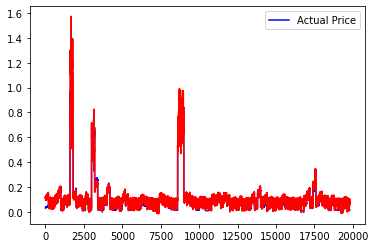

In [15]:
preds_test = pd.DataFrame(preds_test, columns = ['Predictions'], index = y_test.reset_index().index)
plt.plot(y_test.reset_index()[horizons], label='Actual Price', color='b')
plt.plot(preds_test['Predictions'], color='r')
plt.legend()

In [16]:
preds_train, preds_test = lstm_train(technical_indicators, horizons, X_train, y_train, X_test, y_test)
score(horizons, y_test, preds_test)

Epoch 1/20
2467/2467 [==============================] - 27s 10ms/step - loss: 0.0015
Epoch 2/20
2467/2467 [==============================] - 23s 9ms/step - loss: 2.0777e-04
Epoch 3/20
2467/2467 [==============================] - 23s 9ms/step - loss: 1.5691e-04
Epoch 4/20
2467/2467 [==============================] - 23s 9ms/step - loss: 1.1548e-04
Epoch 5/20
2467/2467 [==============================] - 21s 9ms/step - loss: 1.0753e-04
Epoch 6/20
2467/2467 [==============================] - 21s 8ms/step - loss: 8.7851e-05
Epoch 7/20
2467/2467 [==============================] - 24s 10ms/step - loss: 7.0497e-05
Epoch 8/20
2467/2467 [==============================] - 24s 10ms/step - loss: 6.2448e-05
Epoch 9/20
2467/2467 [==============================] - 24s 10ms/step - loss: 7.0488e-05
Epoch 10/20
2467/2467 [==============================] - 21s 8ms/step - loss: 5.7327e-05
Epoch 11/20
2467/2467 [==============================] - 21s 8ms/step - loss: 6.1215e-05
Epoch 12/20
2467/2467 [=======

0.010701286454559276

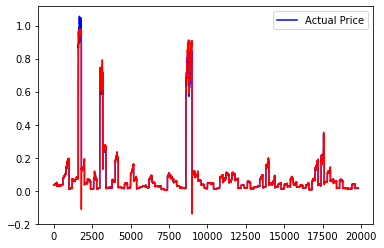

In [17]:
preds_test = pd.DataFrame(preds_test, columns = ['Predictions'], index = y_test.reset_index().index)
plt.plot(y_test.reset_index()[horizons], label='Actual Price', color='b')
plt.plot(preds_test['Predictions'], color='r')
plt.legend()

In [5]:
import sklearn

KeyError: 'mode_reflect'